In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

****IMPORT THE DATA****

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

****DATA EXPLORATION****

In [3]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

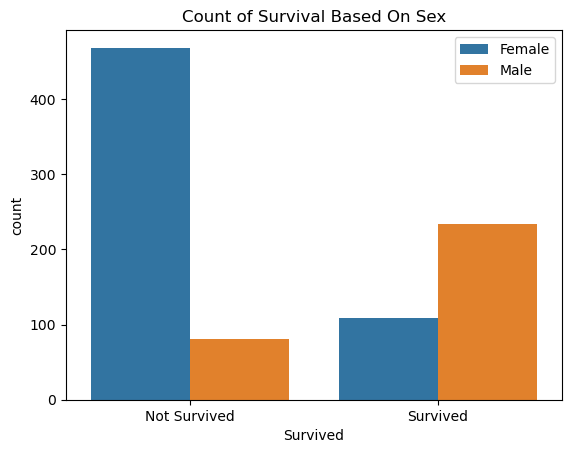

In [7]:
sns.countplot(x='Survived', hue='Sex', data=train_data)
plt.title("Count of Survival Based On Sex")
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.legend(labels = ['Female', 'Male'])
plt.show()

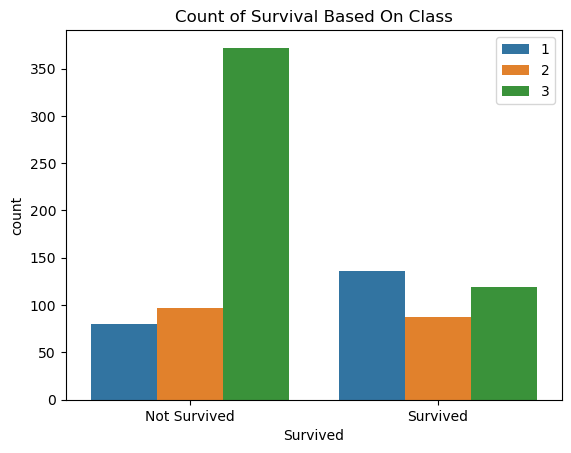

In [8]:
sns.countplot(x='Survived', hue='Pclass', data=train_data)
plt.title("Count of Survival Based On Class")
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.legend(labels = [1, 2, 3])
plt.show()

****DATA PREPERATION****

Drop unnecessary columns

In [9]:
train_data = train_data.drop(['Name', 'Ticket', 'Cabin', 'Fare', 'Embarked', 'PassengerId'], axis=1)
test_data = test_data.drop(['Name', 'Ticket', 'Cabin', 'Fare', 'Embarked'], axis=1)

Drop nan values

In [10]:
train_data = train_data.dropna(axis=0)
test_data = test_data.dropna(axis=0)

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     714 non-null    int64  
 5   Parch     714 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 39.0+ KB


In [12]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 0 to 415
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  332 non-null    int64  
 1   Pclass       332 non-null    int64  
 2   Sex          332 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        332 non-null    int64  
 5   Parch        332 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 18.2+ KB


Convert the categorical data type to numerical data

In [13]:
train_data['Sex'] = train_data['Sex'].replace({'female': 0, 'male': 1})
test_data['Sex'] = test_data['Sex'].replace({'female': 0, 'male': 1})

In [14]:
test_data.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,1,34.5,0,0
1,893,3,0,47.0,1,0
2,894,2,1,62.0,0,0
3,895,3,1,27.0,0,0
4,896,3,0,22.0,1,1


****Construct the model****

In [15]:
y = train_data['Survived']
X = train_data.drop('Survived', axis=1)
X_test = test_data.drop('PassengerId', axis=1)

In [16]:
rfc = RandomForestClassifier(random_state=0)

Find best parameters using grid search cross-validation

In [17]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_samples': [0.1, 0.3, 0.5, 0.7],
    'min_samples_leaf': [1, 2, 4],
    'max_depth' : [4,6,8]
}

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X, y)

In [ ]:
CV_rfc.best_params_

In [ ]:
rfc_best_params = RandomForestClassifier(random_state=0, max_depth=8, max_samples=0.5,
                                        min_samples_leaf=2, n_estimators=200)

In [ ]:
rfc_best_params.fit(X, y)

In [ ]:
preds = rfc_best_params.predict(X_test)

In [ ]:
output = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': preds})
output.to_csv('submission.csv', index=False)